In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from scipy.spatial.distance import pdist, cdist, squareform
d=open("E:\survei geomagnetik.txt","r").readlines()
d = [ i.strip().split() for i in d[1:] ]
d = np.array( d, dtype=np.float )
d = pd.DataFrame( d, columns=['X','Y','value'] )
plt.scatter( d['X'] , d['Y'], c=d['value'] )
plt.xlabel('Easting [m]', fontsize=8)
xticks(np.arange(782820, 782960, step=20))
yticks(np.arange(620480, 620640, step=20))
plt.ylabel('Northing [m]', fontsize=8)
plt.colorbar();
plt.grid();
plt.title('Anomali Magnetik nT') ;
plt.savefig('plotting', bbox_inches="tight",dpi=200);
plt.show();
print(d)

<Figure size 640x480 with 2 Axes>

              X            Y       value
0   782913.8227  620496.1766  118.731035
1   782914.3849  620508.4737  156.596276
2   782914.6661  620514.6222  176.472621
3   782913.9940  620527.5286  193.949517
4   782914.2537  620538.5948  224.169862
5   782912.9951  620544.7366  229.766207
6   782908.9572  620552.7105  300.994727
7   782913.5025  620569.6354  314.905091
8   782909.4833  620573.3062  359.430909
9   782905.1174  620585.8892  366.697454
10  782897.4917  620498.5644  202.034364
11  782897.7487  620510.2453  221.495454
12  782898.3257  620519.1614  217.402696
13  782894.5864  620529.2882  249.705217
14  782892.0694  620541.5718  249.925739
15  782894.8139  620547.7310  261.424087
16  782892.6182  620556.9424  282.386435
17  782888.9017  620561.8440  302.296783
18  782885.4542  620575.6604  288.789130
19  782886.9576  620583.9658  312.775478
20  782879.3145  620500.6367  133.555333
21  782878.3104  620519.0742  202.016000
22  782877.0344  620529.2117  185.095333
23  782877.9140 

In [2]:
P = np.array( d[['X','Y','value']] )
testing=list()
for ii in range(0,52,4):
    testing.append(P[ii])
testing=np.array(testing)
testing=testing.tolist()
data=P.tolist()
training = [ii for ii in data if ii not in testing]
testing=np.array(testing)
training=np.array(training)

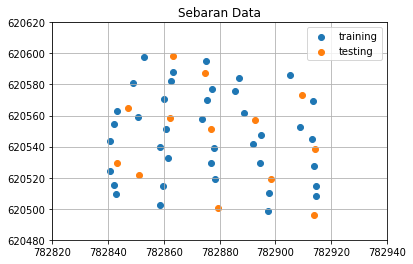

In [3]:
plt.scatter( training[:,0] , training[:,1],label="training" )
plt.scatter( testing[:,0] , testing[:,1],label="testing" )
xticks(np.arange(782820, 782960, step=20))
yticks(np.arange(620480, 620640, step=20))
plt.legend()
plt.grid();
plt.title('Sebaran Data') ;
plt.show();

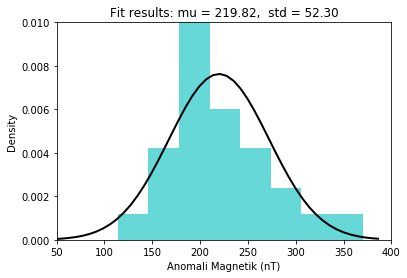

In [4]:
from scipy.stats import norm
hrange = (50, 370)
mu, std = norm.fit(P[:,2])
ahist=plt.hist(P[:,2], bins=10, density=True, alpha=0.6, color='c', range=hrange)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
th=plt.title(title)
xh=plt.xlabel('Anomali Magnetik (nT)')
yh=plt.ylabel('Density')
xl=plt.xlim(50, 400)
yl=plt.ylim(0.0, 0.01)

In [5]:
def SVh( P, h, bw ):
    '''
    Experimental semivariogram for a single lag
    '''
    distance = squareform( pdist( P[:,:2] ) )
    N = len(distance)
    d = list()
    for a in range(N):
        for b in range(a+1,N):
            if( distance[a,b] >= h-bw )and( distance[a,b] <= h+bw ):
                d.append( ( P[a,2] - P[b,2] )**2.0 )
    return np.sum(d)/( 2.0 * len( d ))

def SV( P, hs, bw ):
    '''
    Experimental variogram for a collection of lags
    '''
    sv = list()
    for h in hs:
        sv.append( SVh( P, h, bw ) )
    sv = [ [ hs[a], sv[a] ] for a in range( len( hs ) ) if sv[a] > 0 ]
    return np.array( sv )

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


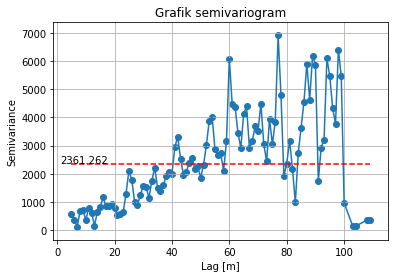

In [6]:
bw=1
maxlag=120
sill= np.var( training[:,2] )
hs = np.arange(0,maxlag,bw)
sv = SV( training, hs, bw ).T
plot( sv[0], sv[1])
plt.scatter( sv[0], sv[1])
c0 = np.var( training[:,2] )
c0 = [c0]*len(sv[0])
plot(sv[0],c0,"--", color='r')
plt.text(bw , sill , str(np.round(sill, decimals=3)))
plt.grid()
xlabel('Lag [m]')
ylabel('Semivariance')
plt.title('Grafik semivariogram') ;
savefig('sample_semivariogram.png',fmt='png',dpi=200)


In [7]:
import sys
sys.path.append('..')
sys.path.append('../geostatsmodels')

In [8]:
from geostatsmodels import  variograms, model, geoplot
import matplotlib.pyplot as plt


In [9]:
range_=60

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


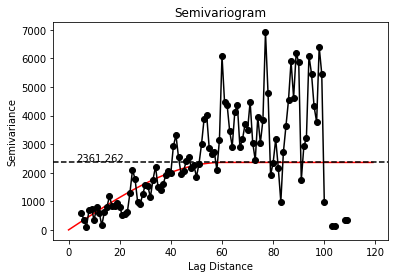

1480.0877406530703

In [10]:
lags = np.arange( 0,maxlag,bw )
sill = np.var( training[:,2] )
svm = model.semivariance( model.spherical, (range_, sill ) )
geoplot.semivariogram( training, lags,bw, model=svm )
RMSE=np.sqrt(np.mean((svm(lags[0:len(sv[1])])-sv[1])**2))
RMSE


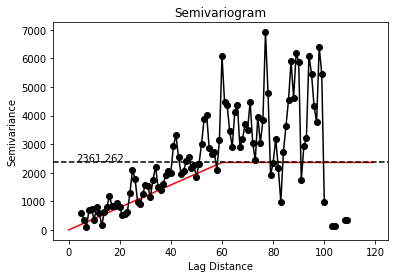

1538.775566989732

In [11]:
lags = np.arange( 0,maxlag,bw )
svm = model.semivariance( model.linear, (range_, sill ) )
geoplot.semivariogram( training, lags,bw, model=svm )
RMSE=np.sqrt(np.mean((svm(lags[0:len(sv[1])])-sv[1])**2))
RMSE

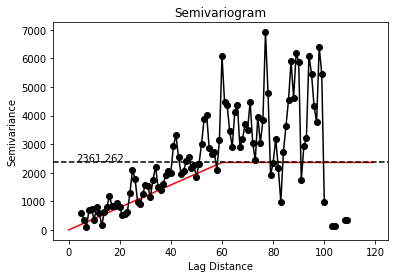

1513.3577465503372

In [12]:
svm1 = model.semivariance( model.exponential, (range_, sill ) )
geoplot.semivariogram( training, lags,bw, model=svm )
RMSE=np.sqrt(np.mean((svm1(lags[0:len(sv[1])])-sv[1])**2))
RMSE

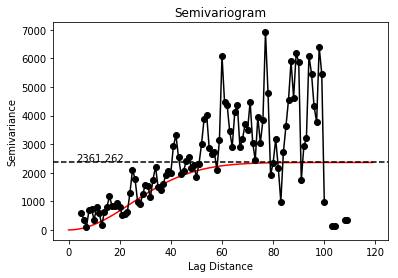

1543.5485036180576

In [13]:
svm = model.semivariance( model.gaussian, (range_, sill ) )
geoplot.semivariogram( training, lags,bw, model=svm )
RMSE=np.sqrt(np.mean((svm(lags[0:len(sv[1])])-sv[1])**2))
RMSE

In [14]:
covfct = model.covariance( model.spherical, (range_, sill ) )

In [15]:
def krige(P,covfct,u,N):
    if np.ndim( u ) == 1:
        u = [u]
    h=cdist(P[:,:2],u,'euclidean')
    P = np.hstack(( P, h ))
    P = P[h[:,0].argsort()[:N]]
    covfct = model.covariance( model.spherical, (range_, sill ) )
    k=covfct(P[:,3])
    k=np.matrix( k ).T
    pd = squareform( pdist( P[:,:2] ) )
    K  = covfct(pd)
    K.shape=(N,N)
    K=np.matrix(K)
    weights = np.linalg.inv( K ) * k
    weights = np.array( weights )
    mean_ = np.mean( P[:,2] )
    residuals = P[:,2] - mean_
    estimation = np.dot( weights.T, residuals ) + mean_
    return estimation

def fulkrige(P,covfct,u,N):
    return [krige(P,covfct,u[i],N) for i in range(0,len(u))]


In [16]:
x=np.arange(782830,782920,0.5)
y=np.arange(620480,620620,0.781)
u=np.meshgrid(x,y)
u=np.transpose(u)
Z=np.concatenate(u)
est=np.array(fulkrige(training,covfct,Z,N=5))
est.shape=(180,180)
est=est.T

In [17]:
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import LinearColorMapper, ColorBar
import bokeh
print('bokeh: '+bokeh.__version__)
output_notebook()

bokeh: 1.0.4


Loading BokehJS ...

In [18]:
p = figure(y_range=(620480,620620), x_range=(782830,782920),
          tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])

color_mapper = LinearColorMapper(palette="Plasma10",low=100, high=400)

p.image(image=[est], y=620480, x=782820, dh=140, dw=120, color_mapper=color_mapper)
p.circle(training[:,0],training[:,1],size=10,fill_color="blue",legend="training")
p.circle(testing[:,0],testing[:,1],size=10,fill_color="red",legend="testing")
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(0,0))

p.title.text = "SIMPLE KRIGING MODELLING"
p.title.text_color = "RED"
p.title.text_font_size = "20px"
p.title.background_fill_color = "#aaaaee"
p.add_layout(color_bar, 'right')
p.xaxis.axis_label = "Easting (m)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Northing (m)"
p.yaxis.axis_label_text_font_style = "italic"

show(p)

In [19]:
def Power(P,training):
    
    h=cdist(P[:,:2],training[:,:2],'euclidean')
    h=h[np.nonzero(h > 0)]
    h.shape=(len(P)-1,len(training))
    n=10
    h_sort=np.sort(h[:,:n])
    power_= np.arange(1,2.1,0.1)
    z=P[:,2][h[:,:n].argsort()]
    w=list()
    for j in range(0,len(power_)):
        w.append(np.power(h_sort,power_[j]))
    w=np.array(w)
    w=1/w
    Zu=list()
    for i in range(0,len(w)):
        for j in range(0,len(training)):
            Zu.append((np.dot(w[i][j],z[j]))/sum(w[i][j]))
    Zu=np.array(Zu)
    zi=training[:,2]
    zi=repeat(zi,len(power_))
    error=Zu-zi
    error.shape=(len(power_),len(training))
    RSME_error=list()
    for we in range(0,len(error)):
        RSME_error.append(np.sqrt(np.mean((error[we])**2)))
    RSME_error=np.array(RSME_error)
    p_optimum=power_[np.argmin(RSME_error)]
    return p_optimum,power_,RSME_error

In [20]:
p_optimum,power,RSME_error=Power(P,training)

<function matplotlib.pyplot.show(*args, **kw)>

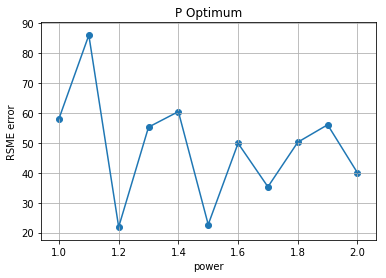

In [21]:
plt.plot( power,RSME_error)
plt.scatter( power,RSME_error)
plt.xlabel('power')
plt.ylabel('RSME error')
plt.title('P Optimum') 
plt.grid()
plt.show

In [22]:
def IDW(training,u,N):
    if np.ndim( u ) == 1:
        u = [u]
    u=np.array(u)
    h=cdist(training[:,:2],u,'euclidean')
    for i, element in enumerate(h):
        if element == 0:
            h[i] = 0.000000001
    training = np.hstack(( training, h ))
    training = training[h[:,0].argsort()[:N]]
    training[:,3]=np.array(training[:,3])
    estimation=sum(np.divide(training[:,2],training[:,3]**p_optimum))/sum(np.divide(1,training[:,3]**p_optimum))
    return estimation

def fulIDW(training,u,N):
    return [IDW(training,u[i],N) for i in range(0,len(u))]

In [23]:
est_idw=fulIDW(training,Z,N=4)
est_idw=np.array(est_idw)
est_idw.shape=(180,180)
est_idw=est_idw.T

In [24]:
p = figure(y_range=(620480,620620), x_range=(782830,782920),
          tooltips=[("x", "$x"), ("y", "$y"), ("value", "@image")])
color_mapper = LinearColorMapper(palette="Plasma10",low=100, high=400)
p.image(image=[est_idw], y=620480, x=782830, dh=140, dw=90, color_mapper=color_mapper)
p.circle(training[:,0],training[:,1],size=10,fill_color="blue",legend="training")
p.circle(testing[:,0],testing[:,1],size=10,fill_color="red",legend="testing")
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(0,0))
p.title.text = "INVERSE DISTANCE WEIGHTED MODELLING"
p.title.text_color = "BLUE"
p.title.text_font_size = "18px"
p.title.background_fill_color = "#aaaaee"
p.add_layout(color_bar, 'right')
p.xaxis.axis_label = "Easting (m)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Northing (m)"
p.yaxis.axis_label_text_font_style = "italic"

# show plot
show(p)

In [25]:
kriging_result=np.array(fulkrige(training,covfct,testing[:,:2],N=5)).T
RMSE_kriging=np.sqrt(np.mean((kriging_result-testing[:,2])**2))
RMSE_kriging

27.212098585105842

In [26]:
IDW_result=np.array(fulIDW(training,testing[:,:2],N=4))
RMSE_IDW=np.sqrt(np.mean((IDW_result-testing[:,2])**2))
RMSE_IDW

31.242953900190223

In [27]:
N=[4,5,6,7,8]

In [28]:
def sample_optimum_IDW(training,testing,N):
    IDW1=np.array(fulIDW(training,testing[:,:2],N))
    RMSE_IDW_=np.sqrt(np.mean((IDW1-testing[:,2])**2))
    return RMSE_IDW_

def sample_optimum_IDW_full(training,testing,N):
    RSME_sample=[sample_optimum_IDW(training,testing,N[i]) for i in range(0,len(N))]
    sample=N[np.argmin(RSME_sample)]
    return sample,RSME_sample

In [29]:
sample,RSME_sample=sample_optimum_IDW_full(training,testing,N)

In [30]:
def sample_optimum_krige(training,testing,N):
    krige1=np.array(fulkrige(training,covfct,testing[:,:2],N)).T
    RMSE_krige_=np.sqrt(np.mean((krige1-testing[:,2])**2))
    return RMSE_krige_

def sample_optimum_krige_full(training,testing,N):
    RSME_sample=[sample_optimum_krige(training,testing,N[i]) for i in range(0,len(N))]
    sample=N[np.argmin(RSME_sample)]
    return sample,RSME_sample

In [31]:
sample_k,RSME_sample_K=sample_optimum_krige_full(training,testing,N)

<function matplotlib.pyplot.show(*args, **kw)>

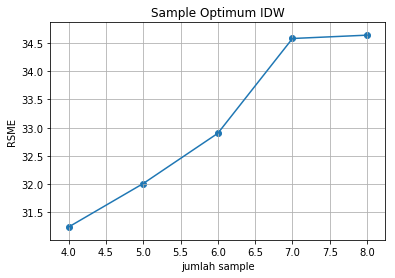

In [32]:
plt.plot( N,RSME_sample)
plt.scatter( N,RSME_sample)
plt.xlabel('jumlah sample')
plt.ylabel('RSME')
plt.title('Sample Optimum IDW') 
plt.grid()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

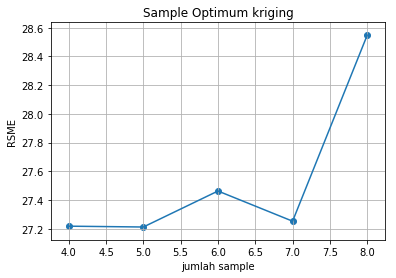

In [33]:
plt.plot( N,RSME_sample_K)
plt.scatter( N,RSME_sample_K)
plt.xlabel('jumlah sample')
plt.ylabel('RSME')
plt.title('Sample Optimum kriging') 
plt.grid()
plt.show

In [34]:
df = pd.DataFrame(d,columns=["X","Y"])
df["z"]=P[:,2]
xysource=ColumnDataSource(df)
p = figure(y_range=(620480,620620), x_range=(782830,782920))
color_mapper = LinearColorMapper(palette="Viridis9",low=100, high=400)
p.circle('X','Y',source=xysource,fill_color={'field':'z','transform':color_mapper},size=10)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')
p.title.text = "Anomali Magnetik (nT)"
p.title.text_font_size = "18px"
p.xaxis.axis_label = "Easting (m)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Northing (m)"
p.yaxis.axis_label_text_font_style = "italic"

show(p)

In [35]:
P = np.array( d[['X','Y','value']] )
testing=list()
for ii in range(0,52,4):
    testing.append(P[ii])
testing=np.array(testing)
testing=testing.tolist()
data=P.tolist()
training = [ii for ii in data if ii not in testing]
testing=np.array(testing)
training=np.array(training)
p = figure( y_range=(620480,620620), x_range=(782830,782920) )
p.circle(training[:,0],training[:,1],size=10,fill_color="blue",legend="training")
p.circle(testing[:,0],testing[:,1],size=10,fill_color="red",legend="testing")
p.title.text = "Sebaran Data"
p.title.text_font_size = "18px"
p.xaxis.axis_label = "Easting (m)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Northing (m)"
p.yaxis.axis_label_text_font_style = "italic"

show(p)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
from scipy.spatial.distance import pdist, cdist, squareform
d=open("E:\survei geomagnetik.txt","r").readlines()
d = [ i.strip().split() for i in d[1:] ]
d = np.array( d, dtype=np.float )
d = pd.DataFrame( d, columns=['X','Y','value'] )
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import LinearColorMapper, ColorBar
import bokeh
print('bokeh: '+bokeh.__version__)
output_notebook()
df = pd.DataFrame(d,columns=["X","Y"])
df["z"]=P[:,2]
xysource=ColumnDataSource(df)
p = figure(y_range=(620480,620620), x_range=(782830,782920))
color_mapper = LinearColorMapper(palette="Viridis9",low=100, high=400)
p.circle('X','Y',source=xysource,fill_color={'field':'z','transform':color_mapper},size=10)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, border_line_color=None, location=(0,0))
p.add_layout(color_bar, 'right')
p.title.text = "Anomali Magnetik (nT)"
p.title.text_font_size = "18px"
p.xaxis.axis_label = "Easting (m)"
p.xaxis.axis_label_text_color = "#aa6666"
p.yaxis.axis_label = "Northing (m)"
p.yaxis.axis_label_text_font_style = "italic"
show(p)

bokeh: 1.0.4


Loading BokehJS ...